# TechLab - Portfolio Optimization Pt.2

Nel secondo laboratorio sperimenteremo come determinare il rendimento atteso e la varianza di un portafoglio di titoli con pesi definiti a priori per poi ottimizzarli per massimizzare lo Sharpe Ratio dello stesso.

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pypfopt import CLA, plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientCVaR

In [2]:
# Scelgo gli asset su cui effettuare l'ottimizzazione

assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Assegno quanta parte del capitale investire in ciascun asset

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
# Scarico i prezzi di mercato degli asset

stockStartDate = '2015-01-01'
stockEndDate = '2020-12-31'
# today = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = stockEndDate)['Adj Close']

df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,24.861401,49.848572,523.373108
2015-01-05,77.190002,302.190002,24.161013,47.311428,512.463013
2015-01-06,76.150002,295.290009,24.163294,46.501431,500.585632
2015-01-07,76.150002,298.420013,24.502111,46.742859,499.727997
2015-01-08,78.180000,300.459991,25.443539,47.779999,501.303680
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,131.773087,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,136.486053,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,134.668762,530.869995,1758.719971


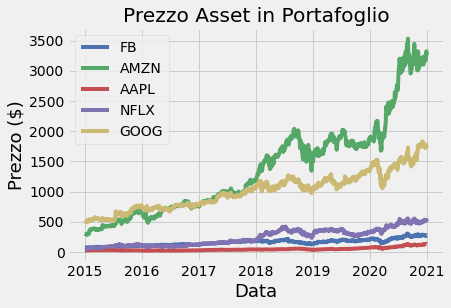

In [5]:
# Visualizzo l'andamento dei prezzi degli asset in portafoglio

title = 'Prezzo Asset in Portafoglio'
my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label =c)

plt.title(title)
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Prezzo ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [6]:
# In luogo dei prezzi, utilizziamo i simple returns

returns = expected_returns.returns_from_prices(df).dropna()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
2015-01-09,-0.005628,-0.011749,0.001072,-0.015458,-0.012951
...,...,...,...,...,...
2020-12-24,-0.002648,-0.003949,0.007712,-0.000991,0.003735
2020-12-28,0.035901,0.035071,0.035766,0.010020,0.021416
2020-12-29,-0.000794,0.011584,-0.013315,0.022634,-0.009780


In [7]:
# Calcoliamo i ritorno annualizzato del portafoglio

portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.34975442124187583

In [8]:
# Calcolo la matrice di covarianza annualizzata per quantificare
# la variazione di ogni variabile aleatoria rispetto alle altre

cov_matrix_annual = returns.cov()*252 # NB: 252 è il numero medio di giorni di contrattazione in 1A
cov_matrix_annual # la diagonale principale esprime la varianza (σ²) annaulizzata 
                  # di ciascun asset, dove σ = volatilità

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.101473,0.059279,0.054329,0.060053,0.057403
AMZN,0.059279,0.096014,0.050783,0.069140,0.054260
AAPL,0.054329,0.050783,0.087807,0.051805,0.048371
NFLX,0.060053,0.069140,0.051805,0.180231,0.054532
GOOG,0.057403,0.054260,0.048371,0.054532,0.072494


In [9]:
# Calcolo la varianza di portafoglio

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06631719126772298

In [10]:
# Calcolo la volatilità di portafoglio

port_volatility = np.sqrt(port_variance)
port_volatility

0.2575212443036943

In [11]:
# Rappresentiamo sinteticamente il ritorno annuo atteso, la volatilità e la varianza del potafoglio a pesi uniformi

percent_var = str(round(port_variance, 2)*100) + '%'
percent_vols = str(round(port_volatility, 2)*100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + '%'

print('Ritorno annuo atteso: '+ percent_ret)
print('Volatilità annua: ' + percent_vols)
print('Varianza annua: ' + percent_var)

Ritorno annuo atteso: 35.0%
Volatilità annua: 26.0%
Varianza annua: 7.000000000000001%


In [12]:
# Ottimizzazione di portafoglio

# Calcoliamo ritorni attesi e matrice di covarianza annualizzata
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Ottimizziamo per massimizzare lo sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.69172), ('AAPL', 0.13095), ('NFLX', 0.17733), ('GOOG', 0.0)])
Expected annual return: 46.2%
Annual volatility: 28.6%
Sharpe Ratio: 1.55


(0.46215601728641165, 0.2858001760280062, 1.5470809830539913)

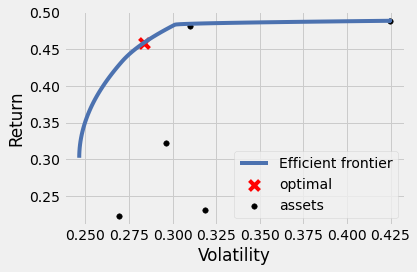

In [13]:
# Rappresentiamo la frontiera efficiente

cla = CLA(mu, S)
cla.max_sharpe()

ax = plotting.plot_efficient_frontier(cla, showfig=False, orientation="top")
  
#newx = ax.lines[0].get_ydata()
#newy = ax.lines[0].get_xdata() 
#ax.lines[0].set_xdata(newx)
#ax.lines[0].set_ydata(newy)

In [14]:
# Calcolo la quantità discreta di azioni da comprare oggi rispetto al budget

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Fund remaining: ${:.2F}'.format(leftover))

Discrete allocation: {'AMZN': 3, 'AAPL': 15, 'NFLX': 5}
Fund remaining: $538.18


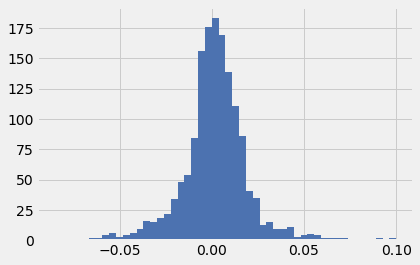

In [15]:
# Rappresentiamo la distribuzione del portafolgio
portfolio_rets = (returns * weights).sum(axis=1)
portfolio_rets.hist(bins=50);

In [16]:
# VaR e CVar del portafoglio ottimizzato per massimizzare lo Sharpe Ratio senza vincoli di rischio
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(-100*var))
print("CVaR: {:.2f}%".format(-100*cvar))

VaR: 2.81%
CVaR: 4.15%


In [17]:
# Nell'ipotesi di minimizzare il CVaR
ec = EfficientCVaR(mu, returns)
ec.min_cvar()
print(ec.clean_weights())
ec.portfolio_performance(verbose=True);

OrderedDict([('FB', 0.04391), ('AMZN', 0.26676), ('AAPL', 0.29522), ('NFLX', 0.0), ('GOOG', 0.39411)])
Expected annual return: 32.2%
Conditional Value at Risk: 3.73%


In [18]:
# Accettando uno CVaR > di quello di portafoglio
ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.05)
print(ec.clean_weights())
ec.portfolio_performance(verbose=True);

OrderedDict([('FB', 0.0), ('AMZN', 0.30356), ('AAPL', 0.0), ('NFLX', 0.69644), ('GOOG', 0.0)])
Expected annual return: 48.7%
Conditional Value at Risk: 5.00%
